In [407]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [408]:
df_train = pd.read_csv("/content/train.csv")

In [409]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [410]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [411]:
df_train.shape

(891, 12)

In [412]:
df_test = pd.read_csv("/content/test.csv")

In [413]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [414]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [415]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [416]:
for col_name in df_train.columns:
    if df_train[col_name].dtypes=='object':
        df_train[col_name] = df_train[col_name].fillna(df_train[col_name].mode()[0])
    else:
        df_train[col_name] = df_train[col_name].fillna(df_train[col_name].mean())

In [417]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [418]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [419]:
df_train.drop(["Name", "Ticket", "Cabin"], axis=1, inplace=True)

In [420]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


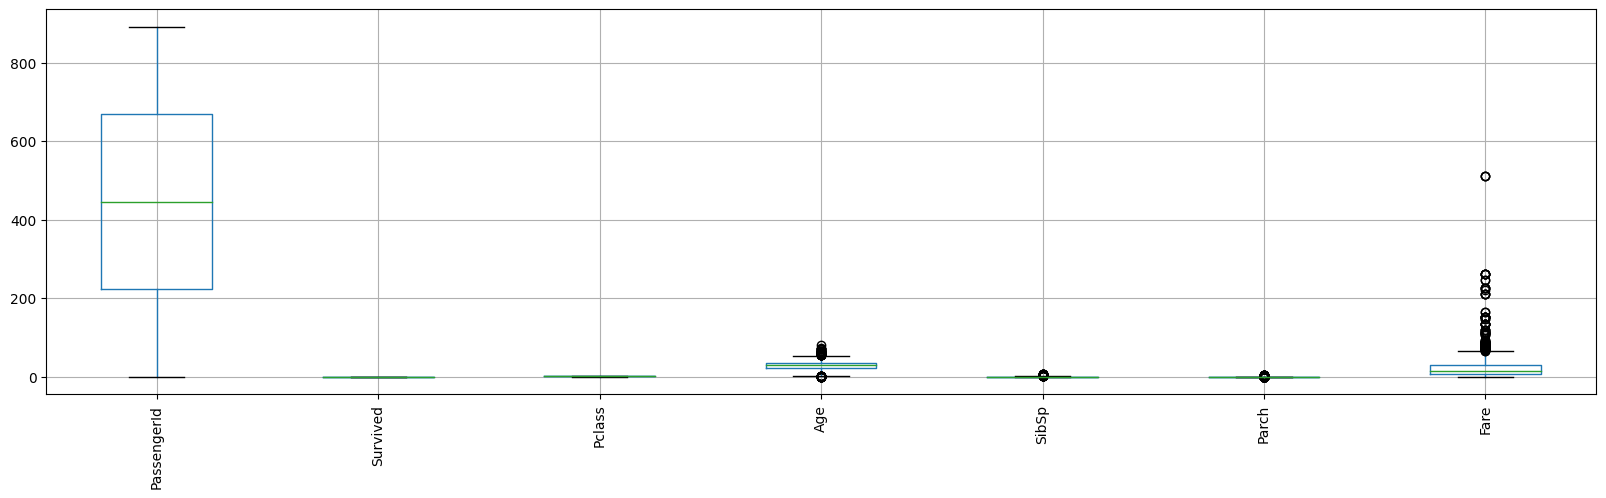

In [421]:
df_train.boxplot(figsize=(20,5))
plt.xticks(rotation='vertical')
plt.show()

In [422]:
df_train = df_train.drop_duplicates()
df_train.shape

(891, 9)

In [423]:
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

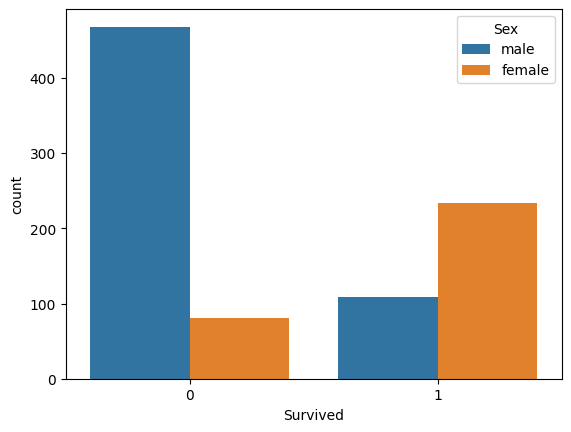

In [424]:
sns.countplot(x='Survived',hue = 'Sex', data=df_train)

<Axes: xlabel='Sex', ylabel='count'>

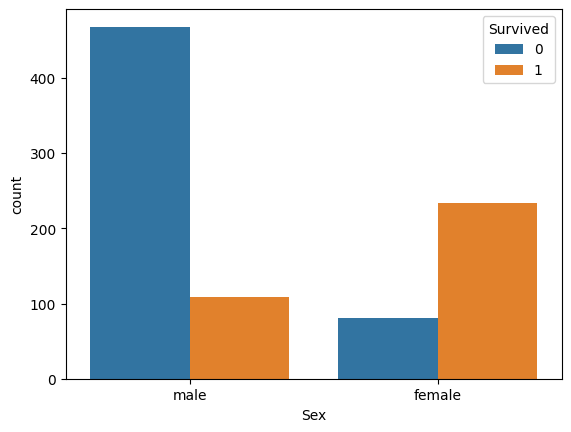

In [425]:
sns.countplot(x='Sex',hue = 'Survived', data=df_train)

In [426]:
df_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

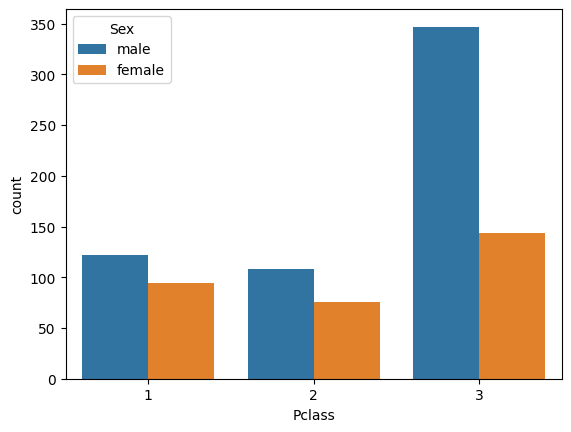

In [427]:
sns.countplot(x='Pclass',hue = 'Sex', data=df_train)

<Axes: xlabel='Pclass', ylabel='count'>

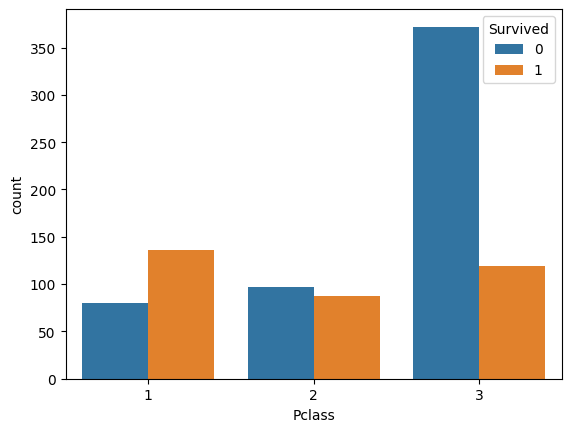

In [428]:
sns.countplot(x='Pclass',hue = 'Survived', data=df_train)

In [429]:
df_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

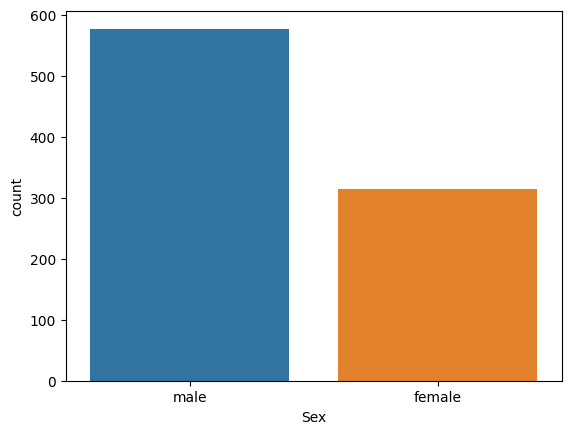

In [430]:
sns.countplot(x='Sex', data=df_train)

In [431]:
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

<Axes: xlabel='Embarked', ylabel='count'>

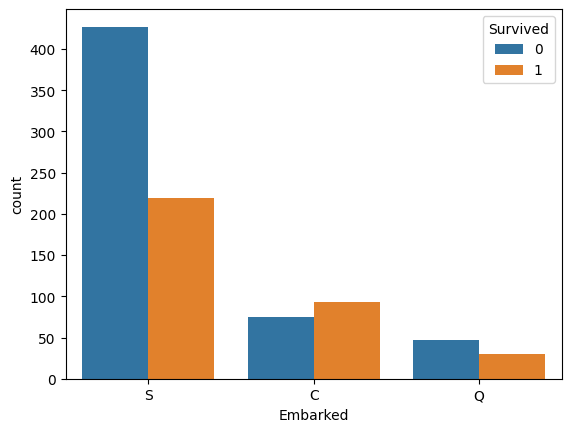

In [432]:
sns.countplot(x='Embarked',hue = 'Survived', data=df_train)

<ipython-input-433-525f5d29c303>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['Fare'])


<Axes: xlabel='Fare', ylabel='Density'>

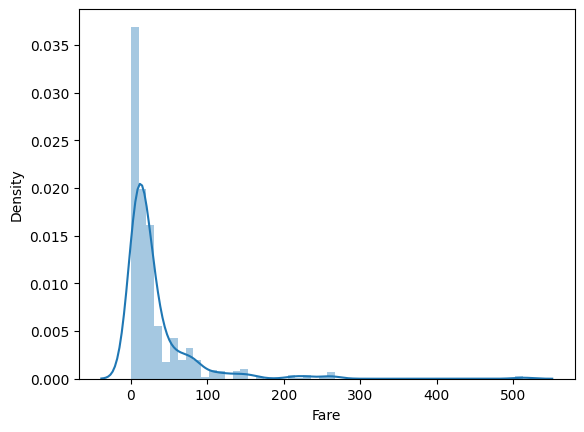

In [433]:
sns.distplot(df_train['Fare'])

<Axes: xlabel='SibSp', ylabel='count'>

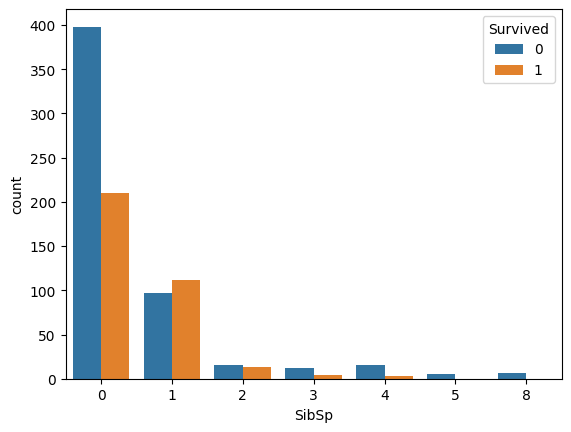

In [434]:
sns.countplot(x='SibSp',hue = 'Survived', data=df_train)

<Axes: xlabel='Parch', ylabel='count'>

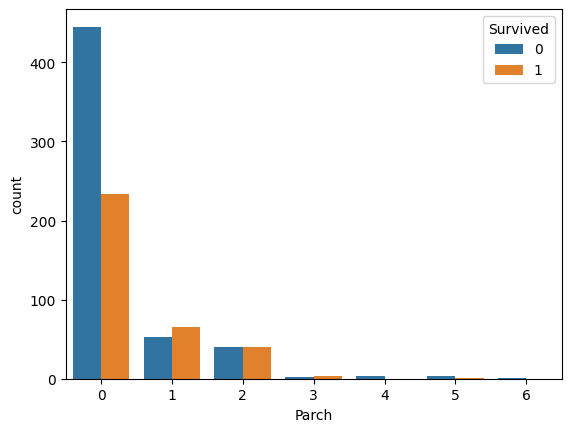

In [435]:
sns.countplot(x='Parch',hue = 'Survived', data=df_train)

In [436]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for col_name in df_train.columns:
    if df_train[col_name].dtypes=='object':
        df_train[col_name]=labelencoder.fit_transform(df_train[col_name])

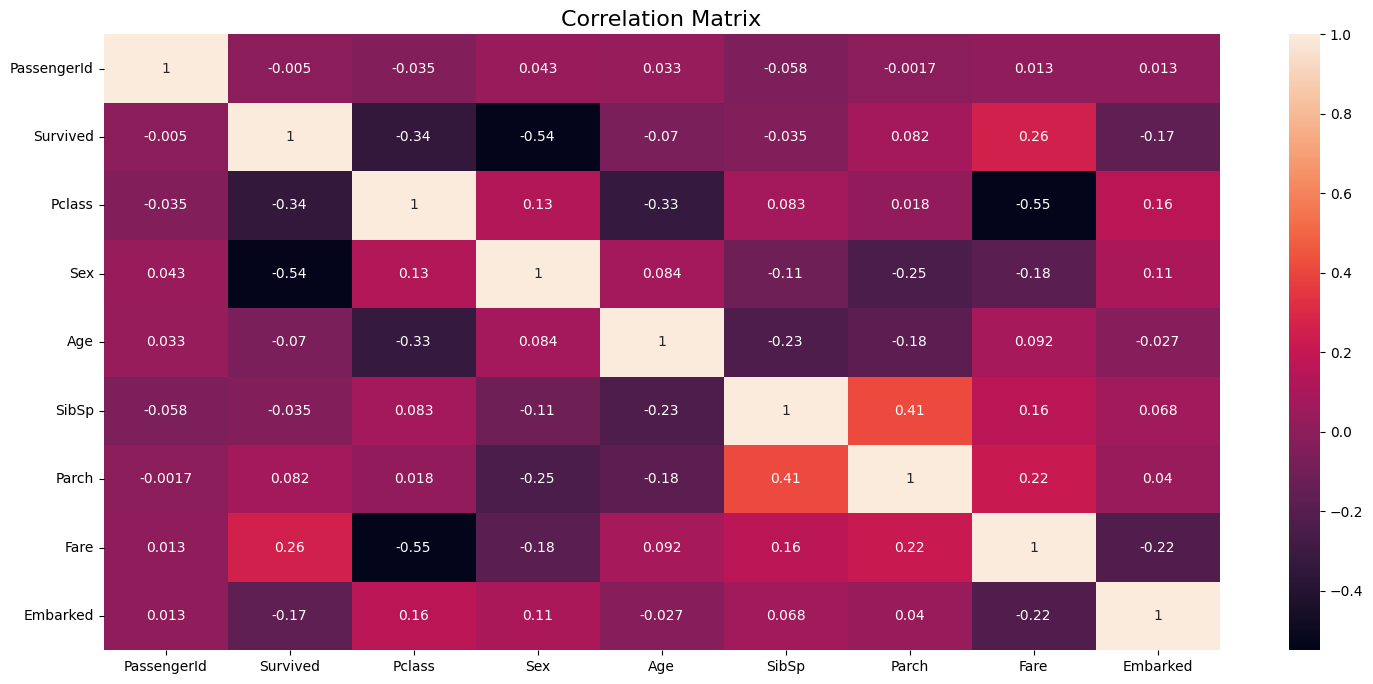

In [437]:
plt.figure(figsize=(18,8))
corr = df_train.corr()
sns.heatmap(corr,vmax=1.0,annot=True)
plt.title('Correlation Matrix',fontsize=16)
plt.show()

In [438]:
x = df_train.drop(['Survived'], axis=1)
y = df_train['Survived']

In [439]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

In [440]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 50,max_features = 3))
sel.fit(x_train,y_train)

SelectFromModel(estimator=RandomForestClassifier(max_features=3,
                                                 n_estimators=50))

In [441]:
selected_feat= x_train.columns[(sel.get_support())]
len(selected_feat)

4

In [442]:
print(selected_feat)

Index(['PassengerId', 'Sex', 'Age', 'Fare'], dtype='object')


In [443]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(x, y)
predictions = model.predict(x_test)

In [444]:
# Calculating accuracy
accuracy = accuracy_score(y_test, predictions)
print("Random Forest Accuracy:", accuracy)

Random Forest Accuracy: 0.8491620111731844


In [445]:
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train)
dt_pred=model_dt.predict(x_test)

In [446]:
# Calculating accuracy
accuracy = accuracy_score(y_test, predictions)
print("Decision Tree Accuracy:", accuracy)

Decision Tree Accuracy: 0.8491620111731844


In [447]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(x_train,y_train)
knn_pred=model_knn.predict(x_test)
knn_acc = accuracy_score(y_test, knn_pred)
print("knn_acc:",knn_acc)

knn_acc: 0.659217877094972


In [448]:
df_test = pd.read_csv("/content/test.csv")

In [449]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [450]:
labelencoder = LabelEncoder()
for col_name in df_test.columns:
    if df_test[col_name].dtypes=='object':
       df_test[col_name]=labelencoder.fit_transform(df_test[col_name])

In [451]:
df_test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Cabin           0
Embarked        0
dtype: int64

In [452]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,206,1,34.5,0,0,152,7.8292,76,1
1,893,3,403,0,47.0,1,0,221,7.0000,76,2
2,894,2,269,1,62.0,0,0,73,9.6875,76,1
3,895,3,408,1,27.0,0,0,147,8.6625,76,2
4,896,3,178,0,22.0,1,1,138,12.2875,76,2


In [453]:
df_test.drop(["Name", "Ticket", "Cabin"], axis=1, inplace=True)


In [454]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,0,47.0,1,0,7.0000,2
2,894,2,1,62.0,0,0,9.6875,1
3,895,3,1,27.0,0,0,8.6625,2
4,896,3,0,22.0,1,1,12.2875,2


In [455]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [456]:
y = df_train["Survived"]
features = ["Pclass", "Sex", "SibSp", "Parch"]
x = pd.get_dummies(df_train[features])
x_test = pd.get_dummies(df_test[features])
model.fit(x, y)
predictions = model.predict(x_test)

sub = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': predictions})
sub.to_csv('submission.csv', index=False)
sub.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
